<a href="https://colab.research.google.com/github/anash18/4105-HW-Nash/blob/main/ECGR_4105_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
np.set_printoptions(suppress=True)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 1

Accuracy: 0.8246753246753247
Precision: 0.7380952380952381
Recall: 0.6595744680851063
F1 Score: 0.6966292134831461

Confusion Matrix for Problem 1 Shown Below


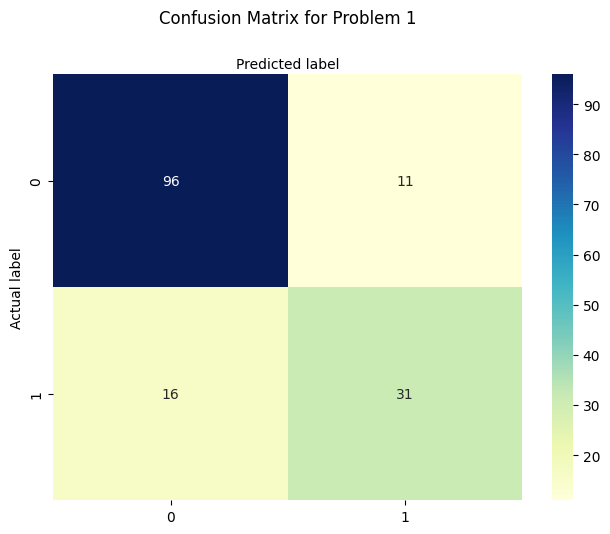

In [2]:
file_path = '/content/drive/My Drive/4105 Datasets/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(file_path))
diabetes.head()


#Splitting the Variables into X and Y
x1 = diabetes.iloc[:, 0:7].values
y1 = diabetes.iloc[:, 8].values

#print(x1[0:10]) #<-Seeing the first values of the array to confirm that it split correctly
#print(y1[0:10]) #<-Seeing the first values of the array to confirm that it split correctly

#splitting the variables into training and test/validation set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

#print(np.size(x1_train)) <- Seeing the size to make sure it split correctly
#print(np.size(x1_test)) <- Seeing the size to make sure it split correctly
#print(np.size(x1)) <- Seeing the size to make sure the split sizes add up to the original size]

#Doing standard scaling on the inputs to make all values are weighted fairly
standard = StandardScaler()
x1_train = standard.fit_transform(x1_train)
x1_test = standard.fit_transform(x1_test)

#Doing logistic regression
classifier_none = LogisticRegression(penalty= None,max_iter=2000, random_state=1)
classifier_none.fit(x1_train,y1_train)

#predicting the y value
y1_pred = classifier_none.predict(x1_test)

#y1_pred[0:9] <- Seeing what the algorithm is predicting

#Gettings the accuracy, precision, recall, and f1 score

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1 Score:", metrics.f1_score(y1_test,y1_pred))

#plotting confusion matrix
cnf_matrix1 = confusion_matrix(y1_test, y1_pred)
#print(cnf_matrix1)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Problem 1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("\nConfusion Matrix for Problem 1 Shown Below")

Problem 2a

Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1 Score: 0.9574468085106385

Confusion Matrix for Problem 2a Shown Below


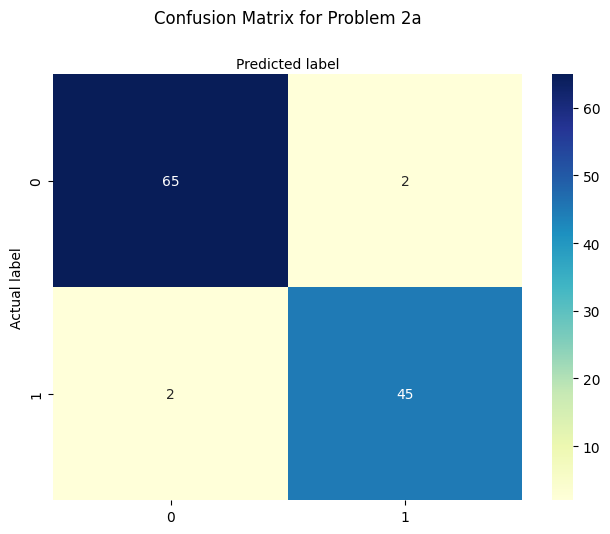

In [3]:
file_path = '/content/drive/My Drive/4105 Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
#print(cancer.head())

varlist = ['diagnosis']

# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

cancer[varlist] = cancer[varlist].apply(binary_map)
#print(cancer.head())

#Splitting the Variables into X and Y
x2 = cancer.iloc[:, 2:32].values
y2 = cancer.iloc[:, 1].values

#print(x1[0:10]) #<-Seeing the first values of the array to confirm that it split correctly
#print(y1[0:10]) #<-Seeing the first values of the array to confirm that it split correctly

#splitting the variables into training and test/validation set
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

#print(np.size(x1_train)) #<- Seeing the size to make sure it split correctly
#print(np.size(x1_test)) #<- Seeing the size to make sure it split correctly
#print(np.size(x1)) #<- Seeing the size to make sure the split sizes add up to the original size

#Doing standard scaling on the inputs to make all values are weighted fairly
x2_train = standard.fit_transform(x2_train)
x2_test = standard.fit_transform(x2_test)

#Doing logistic regression
classifier_none.fit(x2_train,y2_train)

#predicting the y value
y2_pred = classifier_none.predict(x2_test)

#print(y2_pred[0:9]) #<- Seeing what the algorithm is predicting

#Gettings the accuracy, precision, recall, and f1 score
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred,))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
print("F1 Score:", metrics.f1_score(y2_test,y2_pred))

#plotting confusion matrix
cnf_matrix2 = confusion_matrix(y2_test, y2_pred)
#print(cnf_matrix1)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Problem 2a', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("\nConfusion Matrix for Problem 2a Shown Below")

Problem 2b

Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1 Score: 0.9462365591397849

Confusion Matrix for Problem 2b Shown Below


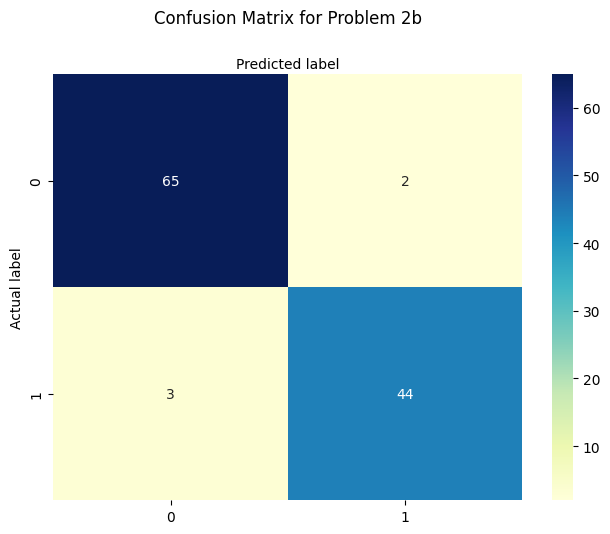

In [4]:
#Doing logistic regression
classifier_penalty = LogisticRegression(penalty= 'l2',max_iter=1000, random_state=1)
classifier_penalty.fit(x2_train,y2_train)

#predicting the y value
y2_pred = classifier_penalty.predict(x2_test)

#print(y2_pred[0:9]) #<- Seeing what the algorithm is predicting

#Gettings the accuracy, precision, recall, and f1 score
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred,))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
print("F1 Score:", metrics.f1_score(y2_test,y2_pred))

#plotting confusion matrix
cnf_matrix2 = confusion_matrix(y2_test, y2_pred)
#print(cnf_matrix1)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Problem 2b', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("\nConfusion Matrix for Problem 2b Shown Below")

Problem 3

Accuracy: 0.9385964912280702
Precision: 0.9347826086956522
Recall: 0.9148936170212766
F1 Score: 0.924731182795699

Confusion Matrix for Problem 3 Shown Below


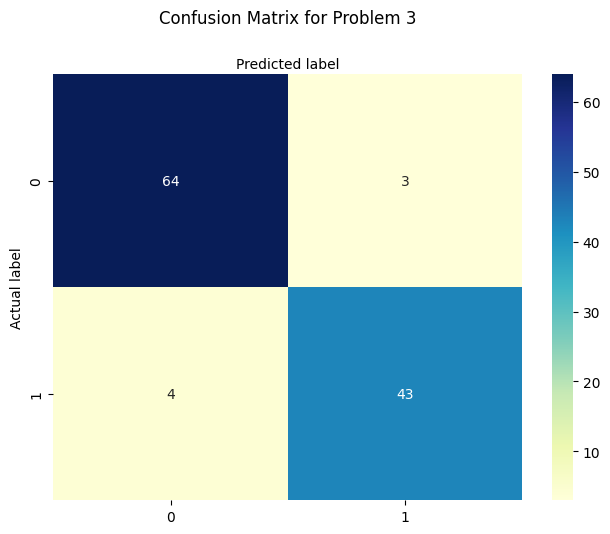

In [5]:
#same values from problem 2 but didn't want to create any confusion
x3_train = x2_train
x3_test = x2_test
y3_train = y2_train
y3_test = y2_test

classifier_naive = GaussianNB()
classifier_naive.fit(x3_train,y3_train)

#Predicting the y values
y3_pred = classifier_naive.predict(x3_test)

#Seeing the first values predicted
#print(y3_pred[0:5])

#Gettings the accuracy, precision, recall, and f1 score
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred,))
print("Precision:",metrics.precision_score(y3_test, y3_pred))
print("Recall:",metrics.recall_score(y3_test, y3_pred))
print("F1 Score:", metrics.f1_score(y3_test,y3_pred))

#plotting confusion matrix
cnf_matrix3 = confusion_matrix(y3_test, y3_pred)
#print(cnf_matrix1)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Problem 3', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("\nConfusion Matrix for Problem 3 Shown Below")

Problem 4

The most accurate K value is:  7
Accuracy:  0.9649122807017544
[0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315]

Accuracy: 0.9649122807017544
Precision: 0.9215686274509803
Recall: 1.0
F1 Score: 0.9591836734693878

Confusion Matrix for Problem 4 Shown Below


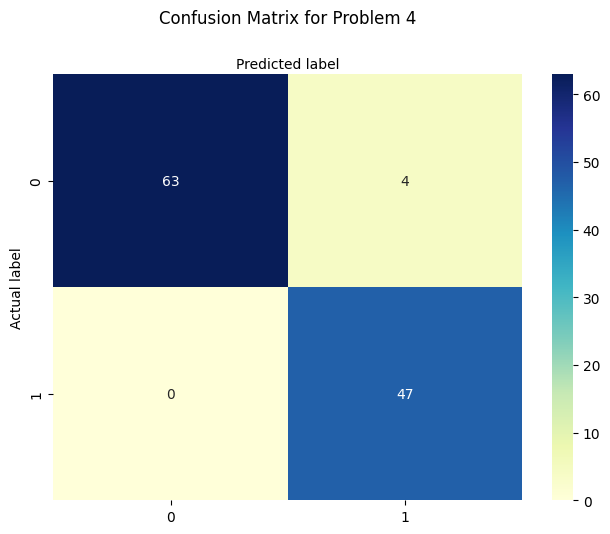

In [6]:
#same values from problem 2 but didn't want to create any confusion
x4_train = x2_train
x4_test = x2_test
y4_train = y2_train
y4_test = y2_test

#setting up a function for PCA reduction
def pcaReduction(x_train,x_test,k):
  pca = PCA(n_components = k)
  x_traintransform = pca.fit_transform(x_train)
  x_testtransform = pca.fit_transform(x_test)
  return x_traintransform,x_testtransform

#using a for loop number of k can be changed easily from 1-31
highest_accuracy4 = 0 #setting up a highest accuracy value
accuracies_array4 = [] #accuracy array

for k in range(1,31):
  x_traintransformed, x_testtransformed = pcaReduction(x4_train,x4_test,k)
  classifier_pca = LogisticRegression(random_state=0)
  classifier_pca.fit(x_traintransformed,y4_train)
  y4_pred = classifier_pca.predict(x_testtransformed)

  accuracies_array4.append(metrics.accuracy_score(y4_test,y4_pred))

  if(metrics.accuracy_score(y4_test,y4_pred) > highest_accuracy4):
    highest_accuracy4 = metrics.accuracy_score(y4_test,y4_pred)
    highest_k4 = k

print("The most accurate K value is: ", highest_k4)
print("Accuracy: ", highest_accuracy4)
print(accuracies_array4)

#rerunning with k value of 7 to get precision and recall
classifier_optimal = LogisticRegression(random_state = 0)
x4_traintransformed, x4_testtransformed = pcaReduction(x4_train,x4_test, highest_k4)
classifier_optimal.fit(x4_traintransformed,y4_train)
y4_pred_final = classifier_optimal.predict(x4_testtransformed)

#Getting the accuracy, precision, recall, and f1 score
print("\nAccuracy:",metrics.accuracy_score(y4_test, y4_pred_final))
print("Precision:",metrics.precision_score(y4_test, y4_pred_final))
print("Recall:",metrics.recall_score(y4_test, y4_pred_final))
print("F1 Score:", metrics.f1_score(y4_test, y4_pred_final))

#Confusion Matrix for Problem 4
#plotting confusion matrix
cnf_matrix4 = confusion_matrix(y4_test, y4_pred_final)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Problem 4', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("\nConfusion Matrix for Problem 4 Shown Below")

Problem 5

The most accurate K value is:  4
Accuracy:  0.9298245614035088
[0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.8947368421052632, 0.8859649122807017, 0.8771929824561403, 0.868421052631579, 0.8771929824561403, 0.8596491228070176, 0.8508771929824561, 0.8596491228070176, 0.8596491228070176, 0.8508771929824561, 0.8508771929824561, 0.8508771929824561, 0.8508771929824561, 0.8508771929824561, 0.8596491228070176, 0.8421052631578947]

Accuracy: 0.9298245614035088
Precision: 0.9333333333333333
Recall: 0.8936170212765957
F1 Score: 0.9130434782608695

Confusion Matrix for Problem 5 Shown Below


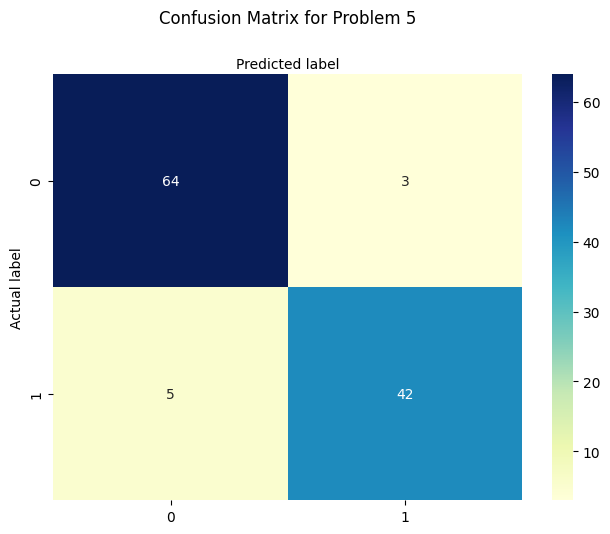

In [11]:
#same values from problem 2 but didn't want to create any confusion
x5_train = x2_train
x5_test = x2_test
y5_train = y2_train
y5_test = y2_test

#using a for loop number of k can be changed easily from 1-31
highest_accuracy5 = 0 #setting up a highest accuracy value
accuracies_array5 = [] #accuracy array

for k in range(1,31):
  x_traintransformed, x_testtransformed = pcaReduction(x5_train,x5_test,k)
  classifier_pca_bayes = GaussianNB()
  classifier_pca_bayes.fit(x_traintransformed,y5_train)
  y5_pred = classifier_pca_bayes.predict(x_testtransformed)

  accuracies_array5.append(metrics.accuracy_score(y5_test,y5_pred))

  if(metrics.accuracy_score(y5_test,y5_pred) > highest_accuracy5):
    highest_accuracy5 = metrics.accuracy_score(y5_test,y5_pred)
    highest_k5 = k

print("The most accurate K value is: ", highest_k5)
print("Accuracy: ", highest_accuracy5)
print(accuracies_array5)

#rerunning with k value of 4 to get precision and recall
classifier_optimal_bayes = GaussianNB()
x5_traintransformed, x5_testtransformed = pcaReduction(x5_train,x5_test, highest_k5)
classifier_optimal_bayes.fit(x5_traintransformed,y5_train)
y5_pred_final = classifier_optimal_bayes.predict(x5_testtransformed)

#Getting the accuracy, precision, recall, and f1 score
print("\nAccuracy:",metrics.accuracy_score(y5_test, y5_pred_final))
print("Precision:",metrics.precision_score(y5_test, y5_pred_final))
print("Recall:",metrics.recall_score(y5_test, y5_pred_final))
print("F1 Score:", metrics.f1_score(y5_test, y5_pred_final))

#Confusion Matrix for Problem 5
#plotting confusion matrix
cnf_matrix5 = confusion_matrix(y5_test, y5_pred_final)


class_names=["M","B"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Problem 5', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("\nConfusion Matrix for Problem 5 Shown Below")